<img src = 'ab.png' />

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.simplefilter('ignore')

<h2>Step 2 -----	Data loading </h2>

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h2> Step 3 ---- Data Preprocessing/ Understanding </h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [5]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

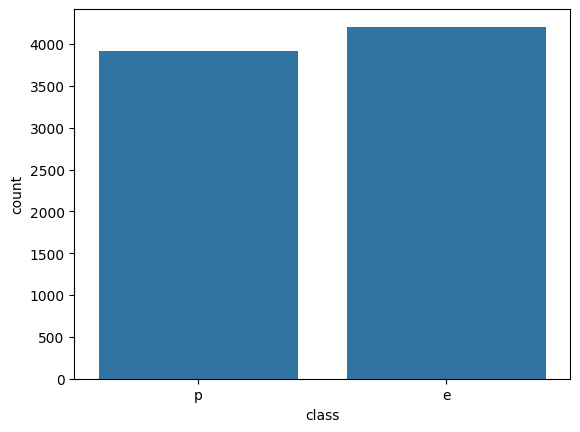

In [6]:
sns.countplot(data=df,x='class')
plt.show()

In [7]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<h2> Step 4 ---- Data Cleaning </h2>

<h2> Step 5 ----- Data wrangling </h2> 

In [9]:
X = df.drop('class', axis =1)
y = df['class']
y = y.map({'e': 0, 'p': 1})
X = pd.get_dummies(X,drop_first = True)# as machine dont understand letters we need to convert it to 0 or 1
X.head() # after encoding out of 3 island categoris 1 is dropped same for sex column as well -  One hot encoding 

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


<h2> Step 6 ---- Best Random State </h2> 

<h2> Step 7 ---- Splitting with best Random state </h2>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
2430,False,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3124,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3605,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2667,False,False,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1039,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False


<h2> Step 8----Default Modelling </h2>

In [13]:
#!pip install xgboost

In [14]:
from xgboost import XGBClassifier
xgb_default = XGBClassifier(random_state=0)
xgb_default.fit(X_train, y_train)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/durgaprasad/Desktop/_WEEKEND/DAY1-Python-Flask/basicpythonenv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <5F165A8A-F42A-39F1-8BD3-CC0F65C2BE0F> /Users/durgaprasad/Desktop/_WEEKEND/DAY1-Python-Flask/basicpythonenv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]


<h2> Step 9	---- Model Evaluation </h2> 

In [11]:
#Predicting

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

pred_train = xgb_default.predict(X_train)
pred_test = xgb_default.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(xgb_default,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[0.84246154 1.         0.99753846 1.         0.82512315]
Cross Validation : 0.9330246305418719


## <h2> With 91% accuracy we can predict the Outcome for the given i/p features with Gradient  Boosting</h2>

<h2> Step 10---- HyperParams Tunning </h2>

In [12]:
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier()
param_grid = {'n_estimators': list(range(1,11)),
              'max_depth':[3,4,5],
              'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
             }
grid = GridSearchCV(estimator,param_grid,cv=5,scoring= 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'gamma': 0.1, 'max_depth': 5, 'n_estimators': 10}

<h3> Hyper params tuning is done in a separate jupyter notebook and not included in the main project<h3>
<h3> Here 20 random decision trees gives the best results</h3>

In [13]:
grid.best_estimator_ # this is the best model for the given data with n_estimators=20 and random_state=0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
grid.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00559944, 0.        , 0.0216339 , 0.        , 0.01021153,
       0.0307156 , 0.        , 0.47903547, 0.01504143, 0.        ,
       0.        , 0.        , 0.02343671, 0.00357161, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.20671538, 0.        , 0.0934462 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01437302, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00108006, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
X_train.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

<h2> Step 11 ----- Final Modelling with Best Hyper Params </h2>

In [16]:
#Drop the column with 0 importance
#X_train = X_train.drop('island_Torgersen', axis=1)

feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0.01]
imp_featues_list = feats_imp.index.to_list()
imp_featues_list

['bruises_t',
 'odor_f',
 'odor_l',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'stalk-root_c',
 'stalk-root_r',
 'stalk-surface-below-ring_y',
 'spore-print-color_r',
 'spore-print-color_u']

In [17]:
X_imp = X[imp_featues_list]
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)
xgb_final = XGBClassifier(gamma= 0.1, max_depth= 5, n_estimators= 10)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<h2> Step12 --- Model Evaluation </h2>

In [18]:
#Predicting

pred_train = xgb_final.predict(X_train)
pred_test = xgb_final.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(xgb_final,X_train,y_train,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 0.9970764733035852
Test Accuracy: 0.9969230769230769
[0.99769231 0.99692308 0.99769231 0.99615385 0.99692071]
Cross Validation : 0.9970764493397288
